# NOTEBOOK (1 of 4) - PyR (Chris Engstrom)

## Q1. Which type of complaint should the DHPD of New York City focus on first?

## Contents
1. Business Understanding
2. Analytical Approach
3. Data Requirements
4. Data Collection
5. Data Understanding
6. Concluding Remarks

## 1. Business Understanding

Problem Statement - The people of New York use the 311 system to report complaints about the non-emergency problems to local authorities. Various agencies in New York are assigned these problems. The Department of Housing Preservation and Development (DHPD) of New York City is the agency that processes 311 complaints that are related to housing and buildings. In the last few years, the number of 311 complaints coming to the DHPD has increased significantly. Although these complaints are not necessarily urgent, the large volume of complaints and the sudden increase is impacting the overall efficiency of operations of the agency.

The DHPD has approached your organization to help them manage the large volume of 311 complaints they are receiving every year. The agency needs answers to several questions which need to be supported by data and analytics:

    1) Which type of complaint should the DHPD of New York City focus on first?
    2) Should DHPD focus on complaints at particular locations where they are most severe?
    3) Does the Complaint Type identified in Q1 have an a useful relationship with particular characteristic(s) of the houses/buildings?
    4) Can a predictive model be built to predict the possibility of future Q1 complaints?
    
Your organization has assigned you as the lead data scientist to provide the answers to these questions. You need to work on getting answers to them in this Capstone Project by following the standard approach of data science and machine learning.

## 2. Analytical Approach

Capstone Notebook (1 of 4) Q1) Which type of complaint should the DHPD of New York City focus on first?

For Q1, after completing Data Requirements and Data Collection phases we will conduct Data Understanding by applying the following steps to confidently anwser Q1:
        - Describe the shape of the NYC 311 dataset
        - View a summary of the dataset
        - View the first rows of the dataset
        - Run Descriptives on the fields in the dataset
        - Run Frequency counts specifically on the 'complaint_type' field
        - Restrict the 'created_date' field per the requirements in the instructions 
        - Re-run Frequency counts for the 'complaint_type' field
        - Plot the frequencies
        - Analyze the results
        - Answer Q1

## 3. Data Requirements

### Setup

In [1]:
# Environment setup
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_c1d08c5c14374903951f00633e391147 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='**********',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

In [2]:
# Create credential and bucket variables
# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_cred = ibm_boto3.client(service_name='s3',
ibm_api_key_id='*************',
ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
config=Config(signature_version='oauth'),
endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

bucket = '******'

### Datasets - Use two datasets from the DHPD of New York City to address their problems.

1) 311 complaint dataset
    - Only use data related to the DHPD
    - Only use the following fields: 
        - created_date, unique_key, complaint_type
        - incident_zip, incident_address, street_name
        - address_type, city, resolution_description
        - borough, latitude, longitude
        - closed_date, location_type, status
    
2) PLUTO dataset for housing
    - Contains data belived to be relevant to solving the stated problem
    - Contains a separate file for each NYC borough

## 4. Data Collection

#### Note: Both datasets have already been collected and uploaded into the IBM Cloud Object Store. 

In [3]:
# Download NYC 311 data from the IBM Cloud Object Store for Data Understanding phase.
# Import pandas
import types
import pandas as pd

#Download the file from IBM Cloud Object Store
client_cred.download_file(Bucket=bucket,Key='df_nyc311_raw_cos.pkl',Filename='./df_nyc311_raw_local.pkl')

#Create a dataframe out of the file
df_nyc311 = pd.read_pickle('./df_nyc311_raw_local.pkl')

## 5. Data Understanding

In [4]:
# Describe the shape of the NYC 311 dataset
df_nyc311.shape 

(5895877, 15)

#### Output confirms the 15 fields that were expected.

In [5]:
# View a summary of the dataset
df_nyc311.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5895877 entries, 0 to 5895876
Data columns (total 15 columns):
created_date              datetime64[ns]
unique_key                int64
complaint_type            object
incident_zip              float64
incident_address          object
street_name               object
address_type              object
city                      object
resolution_description    object
borough                   object
latitude                  float64
longitude                 float64
closed_date               datetime64[ns]
location_type             object
status                    object
dtypes: datetime64[ns](2), float64(3), int64(1), object(9)
memory usage: 674.7+ MB


#### Output describes field types, number of records, etc. and recognized date fields as dates.

In [6]:
# View the first rows of the dataset
df_nyc311.head() 

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
0,2019-11-03 18:33:57,44222420,HEAT/HOT WATER,10472.0,1349 STRATFORD AVENUE,STRATFORD AVENUE,ADDRESS,BRONX,The complaint you filed is a duplicate of a co...,BRONX,40.832973,-73.876391,NaT,RESIDENTIAL BUILDING,Open
1,2019-11-03 22:42:28,44221513,HEAT/HOT WATER,11229.0,1714 AVENUE V,AVENUE V,ADDRESS,BROOKLYN,The complaint you filed is a duplicate of a co...,BROOKLYN,40.596940,-73.953869,NaT,RESIDENTIAL BUILDING,Open
2,2019-11-03 17:58:40,44222229,HEAT/HOT WATER,10002.0,621 WATER STREET,WATER STREET,ADDRESS,NEW YORK,The following complaint conditions are still o...,MANHATTAN,40.711306,-73.983761,NaT,RESIDENTIAL BUILDING,Open
3,2019-11-03 21:36:21,44217728,HEAT/HOT WATER,11373.0,89-21 ELMHURST AVENUE,ELMHURST AVENUE,ADDRESS,Elmhurst,The complaint you filed is a duplicate of a co...,QUEENS,40.747420,-73.876853,NaT,RESIDENTIAL BUILDING,Open
4,2019-11-03 10:44:47,44221452,HEAT/HOT WATER,10467.0,3235 PARKSIDE PLACE,PARKSIDE PLACE,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.874547,-73.874010,NaT,RESIDENTIAL BUILDING,Open


#### Output initially confirms the field names and that the data seem to make sense. 
#### Output also reveals that the dataset contains records with created_date after Dec 31, 2018.

In [7]:
# Run Descriptives on the (numeric) fields
df_nyc311.describe() 

,unique_key,incident_zip,latitude,longitude
count,5.895877e+06,5.815248e+06,5.815274e+06,5.815274e+06
mean,2.923432e+07,1.074764e+04,4.075408e+01,-7.391989e+01
std,7.658809e+06,5.129788e+02,9.088544e-02,5.687527e-02
min,1.562973e+07,1.000100e+04,4.049934e+01,-7.425312e+01
25%,2.279465e+07,1.045200e+04,4.067109e+01,-7.395200e+01
50%,2.910884e+07,1.046900e+04,4.075659e+01,-7.392250e+01
75%,3.545154e+07,1.122400e+04,4.083949e+01,-7.389026e+01
max,4.422381e+07,1.234500e+04,4.091287e+01,-7.370079e+01


#### Output initially does not indicate any major issues with the continuous fields in the dataset. 

In [8]:
# Run Descriptives on the (non-numeric) fields
df_nyc311.describe(include=['object']) 

,complaint_type,incident_address,street_name,address_type,city,resolution_description,borough,location_type,status
count,5895877,5843046,5843046,5811104,5815660,5882655,5895877,5843047,5895877
unique,30,179355,6792,1,89,341,6,5,5
top,HEAT/HOT WATER,34 ARDEN STREET,GRAND CONCOURSE,ADDRESS,BROOKLYN,The Department of Housing Preservation and Dev...,BROOKLYN,RESIDENTIAL BUILDING,Closed
freq,1171736,14259,90317,5811104,1989928,1677278,1703234,5835938,5761624


#### Output initially indicates the following:
    - Record counts are pretty much consistent across the fields
    - There are 30 unique complaint types
    - HEAT/HOT WATER is the most frequently occuring complaint type (accounting for 1,171,736 of the 5,895,877 records (19.9%)
    - There are 6 unique values for the 'borough' field when 5 were expected
    - Before identifying top complaints, Brooklyn is the borough with the highest number of TOTAL complaint records
    - Nearly all complaints have a status of CLOSED
    

In [9]:
# Review the unique values in the 'complaint_type field'
df_nyc311['complaint_type'].unique()

array(['HEAT/HOT WATER', 'UNSANITARY CONDITION', 'DOOR/WINDOW',
       'PAINT/PLASTER', 'APPLIANCE', 'PLUMBING', 'ELECTRIC', 'ELEVATOR',
       'WATER LEAK', 'FLOORING/STAIRS', 'GENERAL', 'SAFETY',
       'OUTSIDE BUILDING', 'HEATING', 'PAINT - PLASTER', 'Electric',
       'Unsanitary Condition', 'HPD Literature Request', 'General',
       'Safety', 'Appliance', 'GENERAL CONSTRUCTION', 'NONCONST',
       'CONSTRUCTION', 'AGENCY', 'STRUCTURAL', 'VACANT APARTMENT',
       'Outside Building', 'Plumbing', 'Mold'], dtype=object)

#### Output shows that some of the unique complaint_types are very similar and will need to be consolidated to get a more accurate understanding of the complaint_type frequencies. For example, it probably makes sense to combine the 'HEAT/HOT WATER' values with the 'HEATING' values and the 'UNSANITARY CONDITION' values with the 'Unsanitary Condition' values etc. A Frequencies analysis is needed to understand how to deal with this issue. The 'HEAT/HOT WATER' and 'HEATING' combination will need to be VALIDATED with the client later on.

In [10]:
# Run Frequency counts specifically on the 'complaint_type' field
df_nyc311_complaint_counts = df_nyc311["complaint_type"].value_counts()
df_nyc311_complaint_counts

HEAT/HOT WATER            1171736
HEATING                    887869
PLUMBING                   705611
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       443007
PAINT - PLASTER            361258
PAINT/PLASTER              343029
ELECTRIC                   304874
NONCONST                   260890
DOOR/WINDOW                201930
WATER LEAK                 190167
GENERAL                    148280
FLOORING/STAIRS            136121
APPLIANCE                  110923
HPD Literature Request      52830
SAFETY                      50634
OUTSIDE BUILDING             7074
ELEVATOR                     6561
Unsanitary Condition         5499
CONSTRUCTION                 5078
General                      1163
Safety                        424
STRUCTURAL                     16
Plumbing                       11
AGENCY                          9
VACANT APARTMENT                8
Outside Building                6
Appliance                       4
Electric                        1
Mold          

#### Comments:
- For the time being we will assume it makes sense to combine ('HEAT/HOT WATER'/'HEATING') compalint types. We may separate them later for analysis.
- Output clearly shows that when all relevant complaint_type value consolidations are eventually completed, ('HEAT/HOT WATER'/'HEATING') combination will be most frequent. 
- However, (though not likely) this may change once we restrict the dataset by the date requirement in the instructions. 
- The top 2 complaint types ('HEAT/HOT WATER'/'HEATING') account for roughly ~35% of total complaints. 
- 'PLUMBING', 'WATER LEAK' are also high on list and may be related to 'HEAT/HOT WATER'/'HEATING' complaints. Will discuss at later time with client.

#### Examine date ranges of dataset.

In [11]:
# Describe the 'created_date' field before the dataset is restricted by date.
df_nyc311[['created_date']].describe()

,created_date
count,5895877
unique,1553688
top,2013-01-24 00:00:00
freq,7581
first,2010-01-01 00:00:00
last,2019-11-03 23:59:45


#### Output shows that the Max date is 2019-11-03. However, project requirements specify an interest only in records created up until Dec 31, 2018. 

#### Restrict date range for analysis.

In [12]:
# Create new df that only includes records with created_date before January 1, 2019.
df_nyc311_dec312018=df_nyc311[df_nyc311['created_date']<'2019']

# Describe the 'created_date' field for the date restricted dataset.
df_nyc311_dec312018[['created_date']].describe()

,created_date
count,5517069
unique,1295884
top,2013-01-24 00:00:00
freq,7581
first,2010-01-01 00:00:00
last,2018-12-31 23:58:53


#### Output shows that the Max created_date is now 2018-12-31. Now we can re-run the Frequencies analysis to answer Q1 

In [13]:
# Run sorted Frequency counts on 'complaint_type' for the new dataset.
df_nyc311_dec312018_complaint_counts = df_nyc311_dec312018["complaint_type"].value_counts()
df_nyc311_dec312018_complaint_counts

HEAT/HOT WATER            1023788
HEATING                    887869
PLUMBING                   673406
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       390908
PAINT - PLASTER            361258
PAINT/PLASTER              311075
ELECTRIC                   289345
NONCONST                   260890
DOOR/WINDOW                179573
WATER LEAK                 167900
GENERAL                    132207
FLOORING/STAIRS            122869
APPLIANCE                  101944
HPD Literature Request      51604
SAFETY                      44088
OUTSIDE BUILDING             6532
ELEVATOR                     5620
CONSTRUCTION                 5078
Unsanitary Condition          141
General                        70
STRUCTURAL                     16
AGENCY                          9
VACANT APARTMENT                8
Safety                          8
Name: complaint_type, dtype: int64

#### Output still shows that when all relevant complaint_type value combinations are complete, ('HEAT/HOT WATER' and 'HEATING') combination is still the most frequent.

#### Plot frequencies. 

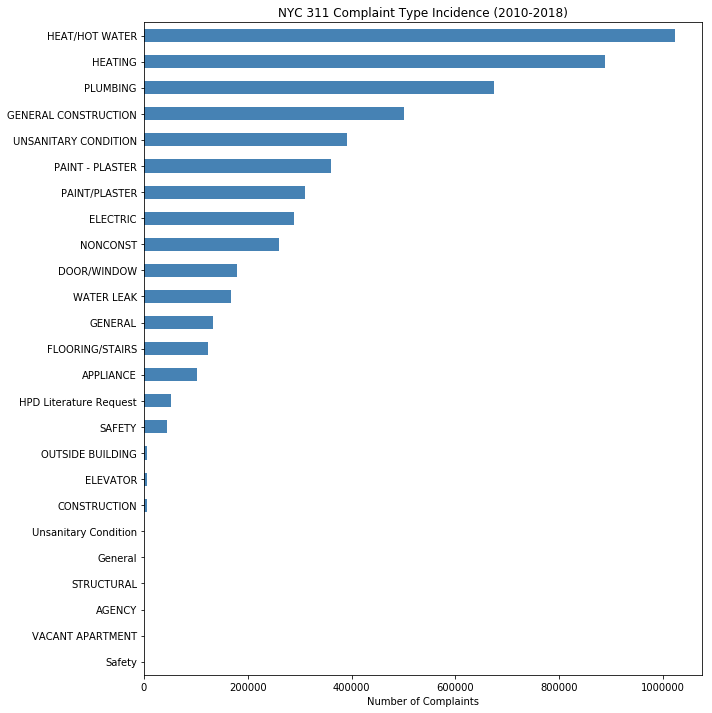

In [14]:
# Plot the Frequencies table
# Import Matplotlib and use the inline backend to generate the plots within the browser
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt

# Sort dataframe 
df_nyc311_dec312018_complaint_counts.sort_values(ascending=True, inplace=True)

# Generate plot
df_nyc311_dec312018_complaint_counts.plot(kind='barh', figsize=(10, 12), color='steelblue')
plt.xlabel('Number of Complaints')
plt.title('NYC 311 Complaint Type Incidence (2010-2018)')
plt.show()

## CONCLUDING REMARKS (Q1):

Q1. Which type of complaint should the DHPD of New York City focus on first?

ANSWER: DHPD should first address the combined complaint types of ('HEAT/HOT WATER' and 'HEATING').

(Note: The assumption to combine ('HEAT/HOT WATER' and 'HEATING') needs to be validated with the client DHPD domain experts.)

Results/Analysis Summary
- There are 30 unique complaint types
- 'HEAT/HOT WATER' is the most frequently occuring complaint type (accounting for 1,171,736 of the 5,895,877 records (19.9%)
- 'HEATING' is a close second and is likely to be highly-related to 'HEAT/HOT WATER' and will be consolidated into a single complaint category.
- The top 2 complaint types ('HEAT/HOT WATER'/'HEATING') account for roughly ~35% of total complaints. 

Stakeholder Questions (To be clarified with DHPD stakeholders):
- Is the combination of 'HEAT/HOT WATER' and 'HEATING' complaints valid?
- 'PLUMBING', 'WATER LEAK' are high on list and may be related to 'HEAT/HOT WATER'/'HEATING' complaints. Is there domain knowledge to support this assumption?
- Would you expect 'PLUMBING', 'WATER LEAK' complaint types to be predictive of 'HEAT/HOT WATER'/'HEATING' complaints?

Other Considerations (Problem formulation ideas to refine the analysis and model down the road):
1. We need to be careful using other complaint types to predict the TARGET variable as it may compromise it and invalidate the model (i.e., create a "leakage" issue).
1. Further restrict dataset to records created after 2015 or 2016. Complaint data relevance likely diminishes with age. Considering only more recent complaints may provide better results. 
2. Examine 'HEAT/HOT WATER'/'HEATING' complaints as % of Total complaints and if this rate has changed over time. This may improve model results. 

### END OF NOTEBOOK (1 of 4)